<a href="https://colab.research.google.com/github/diazonic/Machine-Learning-using-sklearn/blob/master/Scraping_Image_Flickr_and_Converting_into_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
 
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1831 sha256=60717265a3a45be6bd95e831f1fb6e94aed57df0481e17bb7c53a5feec500d5f
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
!git clone https://github.com/ultralytics/flickr_scraper

Cloning into 'flickr_scraper'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 91 (delta 53), reused 40 (delta 16), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
!ls

flickr_scraper	sample_data


In [ ]:
cd flickr_scraper/

/content/flickr_scraper


In [ ]:
!pip install -U -r requirements.txt

     |████████████████████████████████| 61kB 3.2MB/s 


In [ ]:
cd /content/drive/My Drive/Diazonic Files/ML/SVM/flickr_scraper-master/flickr_scraper-master

/content/drive/My Drive/Diazonic Files/ML/SVM/flickr_scraper-master/flickr_scraper-master


In [ ]:
!python flickr_scraper.py --search 'apple' --n 50 --download

0/50 https://farm3.staticflickr.com/2950/15165630350_d6c66a346c_b.jpg
1/50 https://farm1.staticflickr.com/647/21982802134_e4c135c7f8_b.jpg
2/50 https://farm6.staticflickr.com/5805/22255280684_6e706b08d1_b.jpg
3/50 https://farm9.staticflickr.com/8589/16104491773_9cc84cfefc_b.jpg
4/50 https://live.staticflickr.com/8661/16079378039_8376e15595_o.jpg
5/50 https://live.staticflickr.com/5210/5381301033_f1e16537b7_o.jpg
6/50 https://live.staticflickr.com/1012/4731447079_08ca733af8_o.jpg
7/50 https://live.staticflickr.com/8251/8542300647_cdff73e3d2_o.jpg
8/50 https://farm4.staticflickr.com/3037/3033956681_a8d1d5f6d1_b.jpg
9/50 https://live.staticflickr.com/236/449806405_a9b9fdb96a_o.png
10/50 https://live.staticflickr.com/5163/5380930175_e4d5b9518e_o.png
11/50 https://live.staticflickr.com/3312/3207884924_af2fd33020_o.jpg
12/50 https://live.staticflickr.com/7063/6860626645_eded5ea990_o.jpg
13/50 https://farm9.staticflickr.com/8549/29521636782_3289c120f6_b.jpg
14/50 https://live.staticflickr.com

In [ ]:
!python flickr_scraper.py --search 'pizza' --n 50 --download

0/50 https://live.staticflickr.com/8242/8487666183_3eff3d2f23_o.jpg
1/50 https://farm4.staticflickr.com/3043/2954676924_ab2fedbd47_b.jpg
2/50 https://live.staticflickr.com/7758/17325476055_1e852a68e5_o.jpg
3/50 https://live.staticflickr.com/4116/4872435618_fe773aa917_o.jpg
4/50 https://live.staticflickr.com/4012/4703637309_9814305dbc_o.jpg
5/50 https://live.staticflickr.com/7177/6825947764_cab7cae3c8_o.jpg
6/50 https://live.staticflickr.com/5040/7060384125_7047ecdbff_o.jpg
7/50 https://live.staticflickr.com/5589/15311806765_f7a94fd4dc_o.jpg
8/50 https://live.staticflickr.com/5016/5524665573_ca4f37c949_o.jpg
9/50 https://live.staticflickr.com/2808/9493011478_5ba1bab656_o.jpg
10/50 https://live.staticflickr.com/5238/5913452967_c57550acbf_o.jpg
11/50 https://live.staticflickr.com/2270/1912212340_5016fb525f_o.jpg
12/50 https://live.staticflickr.com/1691/25037585162_9888fbf109_o.jpg
13/50 https://live.staticflickr.com/2096/1912198498_e46283f552_o.jpg
14/50 https://live.staticflickr.com/7255

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize

time: 1.11 s


In [3]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

time: 21.8 ms


In [4]:
image_dataset = load_image_files("/content/drive/My Drive/Diazonic Files/ML/SVM/flickr_scraper-master/flickr_scraper-master/images")

time: 7min 14s


In [5]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

time: 4.36 ms


In [6]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 3.25 ms


[0 1]
[50 50]


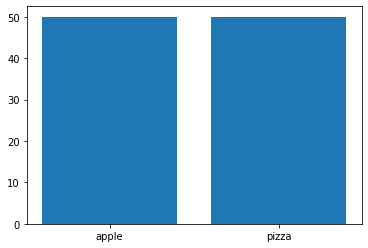

time: 153 ms


In [7]:
#Unique values in an Array
%matplotlib inline
unique,count = np.unique([image_dataset.target],return_counts=True)
print(unique)
print(count)
plt.bar(image_dataset.target_names,count)
plt.show()

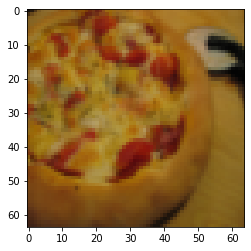

time: 253 ms


In [8]:
%matplotlib inline
plt.imshow(image_dataset['images'][80])
plt.show()

In [9]:
image_dataset['images'][0].shape

(64, 64, 3)

time: 3.53 ms


In [10]:
image_dataset['images'][0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.05882353, 0.09803922, 0.10228248],
        [0.06666667, 0.10588235, 0.10980392],
        [0.07058824, 0.10980392, 0.11764706]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.05586703, 0.09019608, 0.0970435 ],
        [0.0627451 , 0.09604779, 0.10196078],
        [0.06666667, 0.10196078, 0.10980392]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.05098039, 0.08235294, 0.09019608],
        [0.05882353, 0.09019608, 0.09803922],
        [0.0627451 , 0.09411765, 0.10196078]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

time: 10.1 ms


In [ ]:
len(image_dataset['images'])

100

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
image_dataset['target_names']

['apple', 'pizza']

In [ ]:
image_dataset['target_names'][y_pred[0]]

'pizza'

In [ ]:
import pickle
pickle.dump(clf, open( "img_model.p", "wb" ) )

In [ ]:
model = pickle.load(open('img_model.p', 'rb'))

Enter your URLhttps://img.freepik.com/free-photo/delicious-fresh-pizza-served-wooden-table_127657-159.jpg?size=626&ext=jpg
(64, 64, 3)
Predicted Output:pizza


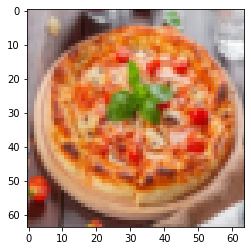

In [ ]:
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img, (64,64), anti_aliasing=True, mode='reflect') #Displaying
flat_data.append(img_resized.flatten()) #Predicting
flat_data = np.array(flat_data)
print(img_resized.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = image_dataset['target_names'][y_out[0]]
print(f'Predicted Output:{y_out}')

Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Red_Apple.jpg/847px-Red_Apple.jpg
(64, 64, 3)
Predicted Output:apple


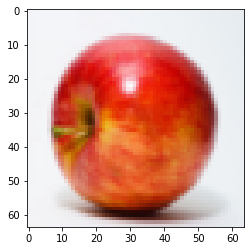

In [ ]:

flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img, (64,64)) #Displaying
flat_data.append(img_resized.flatten()) #Predicting
flat_data = np.array(flat_data)
print(img_resized.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = image_dataset['target_names'][y_out[0]]
print(f'Predicted Output:{y_out}')

In [ ]:
https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Red_Apple.jpg/847px-Red_Apple.jpg

# **2nd Method**

In [12]:
import os # Importing OS Library
target=[]  # List for targets
flat_data = []
images =[]
path = '/content/drive/My Drive/Diazonic Files/ML/SVM/flickr_scraper-master/flickr_scraper-master/images/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        category=dirname.split('/')[-1]
        target.append(category)
        img = imread('{0}{1}/{2}'.format(path,category,filename))
        
        img_resized = resize(img,(64,64))  # Skimage normalizes the value into floating point from 0-1 
        flat_data.append(img_resized.flatten()) 
        images.append(img_resized)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(target.shape)
print(flat_data.shape)
print(images.shape)
# time: 6min 14s

(100,)
(100, 12288)
(100, 64, 64, 3)
time: 6min 14s


In [85]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target

In [86]:
df.to_csv('Apple_Pizza.csv',index = False)

In [87]:
df = pd.read_csv('Apple_Pizza.csv')
df.shape

(100, 12289)

In [88]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287,Target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,apple
1,0.312745,0.160784,0.112745,0.612745,0.288235,0.121569,0.774510,0.417647,0.147059,0.850980,0.592157,0.247059,0.873529,0.661765,0.333333,0.806863,0.522549,0.186275,0.630392,0.366667,0.096078,0.372549,0.158824,0.019608,0.330392,0.137255,0.015686,0.344118,0.130392,0.023529,0.372549,0.112745,0.029412,0.378431,0.066667,0.037255,0.363725,0.039216,0.043137,0.293137,...,0.500980,0.305882,0.290196,0.427451,0.218627,0.216667,0.285294,0.052941,0.060784,0.201961,0.056863,0.046078,0.135294,0.075490,0.056863,0.233333,0.025490,0.021569,0.368627,0.031373,0.031373,0.448039,0.049020,0.041176,0.492157,0.076471,0.054902,0.523529,0.090196,0.066667,0.537255,0.094118,0.062745,0.557843,0.115686,0.075490,0.593137,0.153922,0.099020,apple
2,0.468627,0.089200,0.145741,0.480423,0.013695,0.137286,0.548116,0.000705,0.209605,0.605009,0.078064,0.371599,0.657889,0.233517,0.571798,0.674510,0.262362,0.601578,0.691636,0.256863,0.578431,0.702114,0.248116,0.562745,0.711765,0.287515,0.599694,0.703922,0.373361,0.671860,0.718735,0.406756,0.696952,0.715686,0.366667,0.634850,0.696477,0.380392,0.645098,0.622978,...,0.614124,0.147855,0.076471,0.617019,0.230484,0.089752,0.459023,0.182782,0.069930,0.231036,0.093199,0.025031,0.068321,0.022396,0.007843,0.080086,0.007843,0.003922,0.173591,0.031893,0.003922,0.272978,0.138879,0.000000,0.356679,0.293750,0.000000,0.456357,0.466743,0.000000,0.524786,0.580944,0.014982,0.543137,0.627420,0.056832,0.543137,0.645098,0.094439,apple


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    flat_data, target, test_size=0.3,random_state=109)

In [72]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
y_pred = clf.predict(X_test)
y_pred

array(['pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza',
       'apple', 'apple', 'pizza', 'apple', 'apple', 'apple', 'pizza',
       'pizza', 'apple', 'apple', 'apple', 'pizza', 'pizza', 'pizza',
       'pizza', 'pizza', 'pizza', 'apple', 'apple', 'apple', 'apple',
       'apple', 'pizza'], dtype='<U5')

In [74]:
y_test

array(['pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza', 'pizza',
       'apple', 'apple', 'pizza', 'pizza', 'apple', 'apple', 'pizza',
       'pizza', 'pizza', 'apple', 'apple', 'pizza', 'apple', 'apple',
       'apple', 'pizza', 'pizza', 'apple', 'apple', 'pizza', 'apple',
       'apple', 'pizza'], dtype='<U5')

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[10,  3],
       [ 3, 14]])

In [79]:
accuracy_score(y_pred,y_test)

0.8

In [76]:
import pickle
pickle.dump(clf, open( "model.p", "wb" ) )

In [77]:
model = pickle.load(open('model.p', 'rb'))

Enter your URLhttps://img.freepik.com/free-photo/delicious-fresh-pizza-served-wooden-table_127657-159.jpg?size=626&ext=jpg
(64, 64, 3)


NameError: ignored

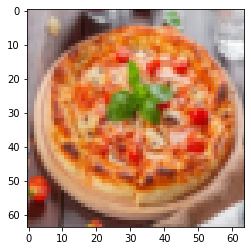

time: 3.45 s


In [20]:
flato_data = []
url = input("Enter your URL")
#https://img.freepik.com/free-photo/delicious-fresh-pizza-served-wooden-table_127657-159.jpg?size=626&ext=jpg
img = imread(url)
img_resized = resize(img, (64,64), anti_aliasing=True, mode='reflect') #Displaying
flato_data.append(img_resized.flatten()) #Predicting
flato_data = np.array(flato_data)
print(img_resized.shape)
plt.imshow(img_resized)
y_out = model.predict(flato_data)
print(f'Predicted Output:{y_out}')

In [21]:
img_resized

array([[[0.6745098 , 0.62898284, 0.6519335 ],
        [0.70588235, 0.67058824, 0.69871324],
        [0.7213848 , 0.68717974, 0.71372549],
        ...,
        [0.82840074, 0.82452369, 0.84020996],
        [0.8323223 , 0.83478334, 0.85098039],
        [0.8421875 , 0.8449482 , 0.86063448]],

       [[0.67996324, 0.63640711, 0.6614277 ],
        [0.70088848, 0.66323482, 0.69411765],
        [0.7213848 , 0.68609069, 0.70980392],
        ...,
        [0.78716299, 0.78431373, 0.80284926],
        [0.79825368, 0.79736567, 0.81697352],
        [0.82530637, 0.82312107, 0.84272892]],

       [[0.67792729, 0.63290441, 0.6627451 ],
        [0.68641669, 0.64841787, 0.6799326 ],
        [0.71843549, 0.68216912, 0.70667078],
        ...,
        [0.76945466, 0.76945466, 0.78514093],
        [0.76945466, 0.76945466, 0.7890625 ],
        [0.77337623, 0.76636029, 0.78596814]],

       ...,

       [[0.33664216, 0.16459722, 0.13405187],
        [0.31689214, 0.14909189, 0.12178309],
        [0.32843137, 0

time: 4.76 ms


In [19]:
# Demo
import cv2
new_path = '/content/drive/My Drive/Diazonic Files/ML/SVM/flickr_scraper-master/flickr_scraper-master/images/apple/10414265306_3655e50c40_o.jpg'
i = cv2.imread(new_path)
i

array([[[143, 177, 170],
        [139, 173, 166],
        [142, 175, 168],
        ...,
        [125, 160, 164],
        [124, 159, 163],
        [125, 160, 164]],

       [[149, 183, 176],
        [144, 178, 171],
        [145, 178, 171],
        ...,
        [123, 158, 162],
        [121, 156, 160],
        [119, 154, 158]],

       [[145, 178, 171],
        [144, 177, 170],
        [141, 174, 167],
        ...,
        [124, 159, 163],
        [122, 157, 161],
        [120, 155, 159]],

       ...,

       [[ 91, 163, 233],
        [ 98, 170, 242],
        [ 96, 167, 241],
        ...,
        [ 67,  57, 193],
        [ 65,  54, 194],
        [ 70,  61, 202]],

       [[ 97, 169, 239],
        [ 99, 171, 243],
        [ 96, 167, 241],
        ...,
        [ 71,  61, 197],
        [ 66,  55, 195],
        [ 70,  60, 204]],

       [[102, 174, 244],
        [100, 172, 244],
        [ 98, 169, 243],
        ...,
        [ 73,  63, 199],
        [ 64,  53, 193],
        [ 67,  57, 201]]

time: 85.3 ms


In [25]:
img.shape

(417, 626, 3)

time: 3.66 ms


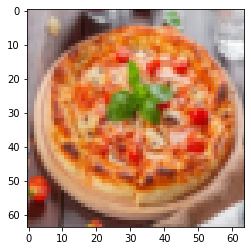

time: 258 ms


In [30]:
img_resized1 = resize(img, (64,64))
plt.imshow(img_resized1)

In [33]:
img_resized1.min()

0.0

time: 4.96 ms


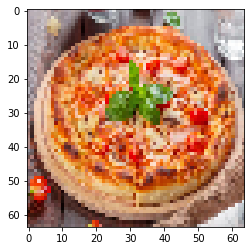

time: 177 ms


In [31]:
img_resized = cv2.resize(img, (64,64))
plt.imshow(img_resized)

In [ ]:

img = imread(url)
img_resized = resize(img, (64,64), anti_aliasing=True, mode='reflect') #Displaying
flato_data.append(img_resized.flatten()) #Predicting
flato_data = np.array(flato_data)
print(img_resized.shape)
plt.imshow(img_resized)
y_out = model.predict(flato_data)
print(f'Predicted Output:{y_out}')